In [1]:
import openai
from dotenv import load_dotenv
from matplotlib import pyplot as plt
import os, re
import random
from typing import Awaitable, cast
import asyncio
from jinja2 import Template
load_dotenv("../../dev.env")
openai.api_key = os.getenv("OPENAI_API_KEY")

In [2]:
SYSTEM_MESSAGE = """You are the most famous research journalist in writing summaries of scientific articles. Your summaries are not only concise, informative and of high quality but they are also very appealing and pleasant to read. You are also an expert in grammar and vocabulary and you can adapt your writing style following the given instructions."""
PROMPT_TEMPLATE = Template("""# Instructions\nWrite a short and concise paragraph of at most {{ number_of_words }} words that summarizes the given documents.\nThe summary should be informative and pleasant for a reader who is an experienced researcher in this field.\nRefer to the documents using 'd' plus their index in square brackets and cite them wherever needed. All documents should be cited. \nEnsure that each citation is supported by the information provided in documents.\nIt is important to combine two or three citations in single sentences instead of creating one sentence for each cited document.\nUse only information from the given documents.\nAvoid the usage of generic sentences that do not refer to any document.\nAvoid mentioning how many documents are given and what is the position of the documents in the list.\nAvoid using the citation as the subject of any phrase or sentence.\n\n# Documents\n{{ documents_context }}""", )


In [3]:
DOCUMENTS_PROMPT_PART = "[d0]: A novel method combining a hyper-network solver with a Fourier Neural Operator architecture improves learning accuracy and interpolation of PDE solutions.\n\n[d1]: Gradient descent can learn a single ReLU function under Gaussian distributions with non-zero bias, achieving a constant factor of optimal error.\n\n[d2]: A new approach for optimal transport (OT) with explicit cardinality constraints on the transportation plan is proposed, improving computational performance.\n\n[d3]: Ocean current prediction and divergence identification are improved by using a Gaussian process with a stationary kernel on vector field components.\n\n[d4]: K-SAM is a simple and easy-to-implement technique that improves the generalization of deep neural networks with little to no additional cost.\n\n[d5]: Supervised representation learning can be used to obtain robust causal estimation in the presence of apparent overlap violations.\n\n[d6]: DAVA, a novel training procedure for variational auto-encoders, completely alleviates the problem of hyperparameter selection for disentangled representations.\n\n[d7]: DOT is a novel optimization framework that assigns cell types to tissue locations by incorporating relevant but previously neglected features.\n\n[d8]: This paper presents a theoretical bound for learning rate schedules that can guarantee convergence for Non-negative Matrix Factorization (NMF) problems.\n\n[d9]: DECN, a deep evolutionary convolution network, is designed for continuous black-box optimization, surpassing population-based baselines and running 102 times faster.\n\n[d10]: Researchers have developed subquadratic time algorithms for kernel-based machine learning and graph processing, breaking the quadratic barrier for several fundamental problems.\n\n[d11]: The paper presents a new method for $\\ell_1$ and logistic regression, achieving a smaller sketching dimension and efficient optimization problem.\n\n[d12]: A new stochastic multi-objective gradient correction method called MoCo is developed to improve empirical performance in multi-objective optimization.\n\n[d13]: A neural network approximation can efficiently compute parametrizations of data manifolds in shape spaces with a product structure.\n\n[d14]: Sharpness-aware minimization (SAM) is established as a relaxation of the Bayes objective, enabling a new path to robustness.\n\n[d15]: Model-based neural networks exhibit higher generalization capability than ReLU neural networks for sparse recovery, as shown theoretically and experimentally.\n\n[d16]: A novel autoencoder architecture is proposed for self-supervised structured representation learning, improving downstream tasks such as generative modeling.\n\n[d17]: The DCI-ES framework proposes two new measures of representation quality, explicitness and size, to quantify the ease-of-use of a representation.\n\n[d18]: Betty is a software library for large-scale multilevel optimization that reduces computational complexity and improves scalability, achieving better results.\n\n[d19]: The Deep Variational Implicit Process (DVIP) is a multi-layer generalization of Implicit Processes (IPs) that outperforms previous IP-based methods and deep GPs.\n\n[d20]: A neural network architecture is designed to learn the mapping from observational and interventional data to graph structures for causal induction.\n\n[d21]: SP2, a new method for solving interpolation equations, uses local second-order approximation of the model and Hessian-vector products to speed-up convergence.\n\n[d22]: Researchers propose three methods to make sparsity-inducing methods like importance sampling fully differentiable for efficient learning algorithms.\n\n[d23]: The Martingale Posterior Neural Process (MPNP) is a new model that uses a predictive distribution to estimate stochastic processes.\n\n[d24]: A simple model using conservative gradient estimates computational costs of backward and forward modes of algorithmic differentiation for nonsmooth programs.\n\n[d25]: A deep latent variable model called CLAP is proposed for Compositional LAw Parsing, which outperforms baseline methods in multiple visual tasks.\n\n[d26]: Transformer networks can be programmed with specific weights and placed in a loop to emulate basic computing blocks.\n\n[d27]: A deterministic $k$-means algorithm is proposed for clustering in the learning-augmented setting, improving the clustering cost bound and runtime.\n\n[d28]: The Tensor Programs framework is used to extend the neural tangent kernel and feature learning limits to adaptive gradient optimizers.\n\n[d29]: A new approach to learning arbitrary Bregman divergences in a differentiable manner via input convex neural networks is proposed.\n\n[d30]: GeneDAE, a sparse denoising autoencoder, extracts gene representations from population-level genotype data to identify gene-to-disease associations, revealing novel associations.\n\n[d31]: ISAAC is a novel method that conditions the gradient using selected second-order information, allowing effective training even in small-batch stochastic regimes.\n\n[d32]: Researchers study the \"edge-of-stability\" regime in deep neural networks and explain why the final converging point has sharpness close to $2/\\eta$.\n\n[d33]: Denoising Diffusion Samplers (DDS) are introduced as a new method to sample from unnormalized probability density functions and estimate their normalizing constants.\n\n[d34]: This paper explains why and when Local SGD generalizes better than SGD, based on Stochastic Differential Equation approximation.\n\n[d35]: A Bayesian framework for human-in-the-loop pipelines is proposed to integrate expert opinions with machine learning models for superior performance.\n\n[d36]: Noise Injection Node Regularization (NINR) improves robustness against various test data perturbations for feed-forward DNNs, outperforming existing methods.\n\n[d37]: The proposed concept of compatibility characterizes generalization in a data-relevant and algorithm-relevant manner, providing a more suitable notion for generalization.\n\n[d38]: A simple data model inspired by natural data is proposed to study the importance of learning features for good generalization.\n\n[d39]: Dropout with continuously distributed noise ensures finite mutual information and enables meaningful information plane analysis for dropout neural networks.\n\n[d40]: MRIV is a novel machine learning framework that estimates conditional average treatment effects using binary instrumental variables.\n\n[d41]: This paper provides the first theoretical analysis of training a three-layer Vision Transformer (ViT) for a classification task.\n\n[d42]: The model-based causal Bayesian optimization algorithm (MCBO) is proposed to learn a full system model for causal Bayesian optimization.\n\n[d43]: Online SGD with weight decay can train a two-layer neural network to converge to the principal subspace of the true model.\n\n[d44]: A novel estimation method called SUBNET is proposed to solve the continuous-time nonlinear state-space model identification problem with robustness.\n\n[d45]: The mismatch between training and test losses, known as the \"LU mechanism,\" explains grokking, a phenomenon where generalization occurs after overfitting.\n\n[d46]: This paper analyzes gradient descent with hard and conjugate labels for test-time adaptation and shows that conjugate labels outperform hard labels.\n\n[d47]: Continuized Nesterov acceleration can be applied to minimize quasar convex functions, achieving optimal bounds with high probability.\n\n[d48]: Intra-layer links can improve a network's representation capability, challenging the depth separation theory and suggesting shallow networks can match deep networks.\n\n[d49]: Predictor-corrector algorithms are developed for time-varying stochastic optimization problems in machine learning, outperforming non-predictor methods.\n\n[d50]: This paper introduces a new approach to measuring flatness in neural networks that is invariant to scaling transformations.\n\n[d51]: The oracle approximate vanishing ideal algorithm (OAVI) for constructing generators of the approximate vanishing ideal is scaled up with improved training time.\n\n[d52]: A scheme of time-varying integration time based on Chebyshev polynomials is proposed to accelerate Hamiltonian Monte Carlo sampling.\n\n[d53]: The linear structure of noisy linear ICA is identifiable and shared sources can be recovered with diverse views and data points.\n\n[d54]: The first evidence that double descent does not exist in self-supervised settings is presented, with a discussion on the theoretical underpinnings of deep learning.\n\n[d55]: The study analyzes the relationship between learned features, function approximation, and learning rules in deep neural networks.\n\n[d56]: CUTS is a neural Granger causal discovery algorithm that imputes unobserved data points and builds causal graphs from irregular time-series data.\n\n[d57]: A new family of regularized R\u00e9nyi divergences is proposed, which interpolates between classical R\u00e9nyi divergences and integral probability metrics.\n\n[d58]: The Recursive Interpolation Method (RIM) is a general recursive framework for time series augmentation that generates new time series for training, improving performance.\n\n[d59]: Q-GenX, a communication-efficient algorithm, is proposed for solving monotone variational inequality problems in multi-GPU settings, achieving fast convergence.\n\n[d60]: A Generalized Precision Matrix is used to characterize the conditional independence structure in general distributions for all data types.\n\n[d61]: GOGGLE is an end-to-end message passing scheme that exploits relational structures to generate realistic synthetic data for tabular domain.\n\n[d62]: A novel spherical Sliced-Wasserstein discrepancy is introduced, extending the use of Wasserstein distance to manifolds, with efficient algorithms and machine learning applications.\n\n[d63]: Filter Gradient Descent (FGD) is a family of stochastic optimization algorithms that reduces variance in stochastic gradient descent.\n\n[d64]: The paper presents a novel multi-objective regret framework for Multi-Objective Online Convex Optimization, which is optimized via first-order iterative methods.\n\n[d65]: DiffAN is a topological ordering algorithm that leverages diffusion probabilistic models to scale up causal discovery from observational data.\n\n[d66]: The graph-based neural ODE, GNODE, with explicit constraints and additional inductive biases, outperforms Lagrangian and Hamiltonian graph networks.\n\n[d67]: Grokking is a phenomenon where a model overfits before generalizing perfectly, and it corresponds to the emergence of a sparse subnetwork.\n\n[d68]: MORBiT is a novel algorithm that solves a generic min-max multi-objective bilevel optimization problem with applications in robust machine learning.\n\n[d69]: This paper analyzes the extrapolation properties of Gradient Descent when applied to overparameterized linear RNNs, providing theoretical evidence for learning low dimensional state spaces.\n\n[d70]: A new framework for learning with logical constraints is proposed, addressing shortcut satisfaction issues and demonstrating superior performance.\n\n[d71]: A new framework for data valuation is introduced, which values training data in a way that is independent of the downstream learning algorithm.\n\n[d72]: The paper shows that mini-batch k-means terminates within O(d/\u03b5) iterations with high probability, regardless of initialization, and achieves an O(log k) approximation ratio.\n\n[d73]: A tensor-based sketching method is proposed for low-rank approximation of data streams, which is more accurate and faster than previous work.\n\n[d74]: The convergence bounds of stochastic gradient descent-ascent with random reshuffling for nonconvex-nonconcave objectives with Polyak-{\\L}ojasiewicz geometry are studied.\n\n[d75]: Physics-based symbolic regression improves power flow modeling and analysis by integrating physical laws and constraints using physics-informed neural networks.\n\n[d76]: Empirical study shows that the generalization error of wide neural networks is well-approximated by infinite width neural networks for small training set sizes, but becomes worse than infinite width networks after a critical sample size.\n\n[d77]: The paper presents a neural ODE flow network inspired by the JKO scheme, allowing efficient block-wise training and adaptive time-reparametrization.\n\n[d78]: FOCA is a learning framework that models sets of systems with common but unknown laws, outperforming baselines in empirical tests.\n\n[d79]: This paper presents a new approach to derive near-optimal exponential generalization bounds for $L_q$-stable learning algorithms.\n\n[d80]: A new approach to optimizing functions without gradients is proposed using meta-learning to discover effective update rules for evolution strategies.\n\n[d81]: Causal data augmentation using acyclic-directed mixed graph (ADMG) can improve model robustness, but is sensitive to hyperparameters and outliers.\n\n[d82]: The paper presents new techniques to explicitly bound the convergence rate of AdaGrad and its variants for smooth convex functions.\n\n[d83]: This paper proves that both $C$-UAP and $L^p$-UAP for functions on compact domains share a universal lower bound of the minimal width.\n\n[d84]: A 3D equivariant diffusion model is developed to design drugs for a specific protein target, generating molecules with more realistic 3D structures and better affinities.\n\n[d85]: A new method for scalable subset sampling based on conditional Poisson sampling is presented, allowing for differentiable subset size parameter $k$.\n\n[d86]: A new particle-based VI algorithm called PFG is proposed, which has a larger function class and improved scalability compared to SVGD.\n\n[d87]: This paper explores the role of momentum parameter in implicit regularization in Heavy-ball momentum accelerated gradient descent.\n\n[d88]: New learning-based sketching algorithms optimize both the values and locations of non-zero entries, achieving good accuracy with fast running time.\n\n[d89]: Empirical evaluation shows that explicitly penalizing the gradient norm or the Fisher Information Matrix trace recovers small-batch SGD generalization.\n\n[d90]: SIVI-SM is a new method for semi-implicit variational inference that uses score matching to handle intractable variational densities.\n\n[d91]: A novel Domain Agnostic Representation Model (DarMo) is proposed to disentangle disease-related features from center-effects in image-based diagnosis.\n\n[d92]: New algorithms, SVRP and Catalyzed SVRP, are proposed for communication-efficient federated optimization under second-order similarity and strong convexity.\n\n[d93]: The representation cost of fully connected neural networks with homogeneous nonlinearities converges to a notion of rank over nonlinear functions.\n\n[d94]: The paper quantifies the number of training samples needed to guarantee high accuracy on every input value for ReLU neural networks.\n\n[d95]: A new optimization method, a generalization of Lookahead, is proposed and empirically validated to achieve better results and faster convergence than SGD and Lookahead.\n\n[d96]: Identifiable variational autoencoders (iVAEs) can also discard superfluous latent variables, similar to classical VAEs with a standard Gaussian prior.\n\n[d97]: MatPropXtractor is a three-step pipeline that uses pre-trained large language models to extract materials and their properties from materials science literature.\n\n[d98]: A new formulation of the reconstruction term for variational autoencoders (VAEs) reduces blurry image generation while maximizing ELBO.\n\n[d99]: A new learned index framework with dynamic $\\epsilon$ is proposed, improving index performance with better space-time trade-off."

DOC_SUMMARIES = [doc.split(']: ')[1] for doc in DOCUMENTS_PROMPT_PART.split('\n\n')]
DOC_IDS = list(range(100))
ITERATIONS = 100

In [4]:
def extract_citations(text):
    pattern = r'\[d(\d+(?:, d\d+)*)\]'
    matches = re.findall(pattern, text)
    cited_docs = set()
    for match in matches:
        docs = match.split(', d')
        for doc in docs:
            cited_docs.add(int(doc))
    return sorted(list(cited_docs))


In [5]:
random_permutations = []
random_permutations_dicts = []
chat_messages_list = []
for i in range(ITERATIONS):
    random_permutation = random.sample(DOC_SUMMARIES, len(DOC_SUMMARIES))
    random_permutation_dict = {index: DOC_SUMMARIES.index(summary) for index, summary in enumerate(random_permutation)}
    
    random_permutations.append(random_permutation)
    random_permutations_dicts.append(random_permutation_dict)

    documents_value = '\n\n'.join(
        [f"[d{index+1}]: {summary}" for index, summary in enumerate(random_permutation)]
    )
    prompt = PROMPT_TEMPLATE.render(**{"documents_context": documents_value, "number_of_words": 100})
    chat_messages = [
        {"role": "system", "content": SYSTEM_MESSAGE},
        {"role": "user", "content": prompt},   
    ]
    chat_messages_list.append(chat_messages)
    



In [ ]:
async def complete_chat(chat_messages, retries_left = 10):
    try:
        response = await openai.ChatCompletion.acreate(
            model="gpt-3.5-turbo-0301",
            messages=chat_messages,
            max_tokens=512,
            temperature=0.0,
            top_p=1,
        )
    except Exception as e:
        if retries_left == 0:
            raise e
        
        print(f"Sleeping for 100 seconds due to error {e}")
        await asyncio.sleep(100)
        print("Retrying...")
        return await complete_chat(chat_messages, retries_left - 1)
    
    return response.choices[0]["message"]["content"]


cluster_summaries = await asyncio.gather(
        *[
            cast(
                Awaitable[str],
                complete_chat(messages),
            )
            for messages in chat_messages_list
        ]
    )



In [8]:
citation_lists = []
selected_papers_list = []

for cluster_summary, random_permutation_dict in zip(cluster_summaries, random_permutations_dicts):
    cited_indices = extract_citations(cluster_summary)
    citation_lists.append(cited_indices)
    selected_papers_list.append([random_permutation_dict[index-1]+1 for index in cited_indices])


In [9]:
def histogram_of(list_of_lists):
    histogram = {}
    total_num = 0
    for citations in list_of_lists:
        if citations != []:
            total_num += 1
        for citation in citations:
            if citation in histogram:
                histogram[citation] += 1
            else:
                histogram[citation] = 1
    for citation in histogram:
        histogram[citation] /= total_num
        
    return histogram

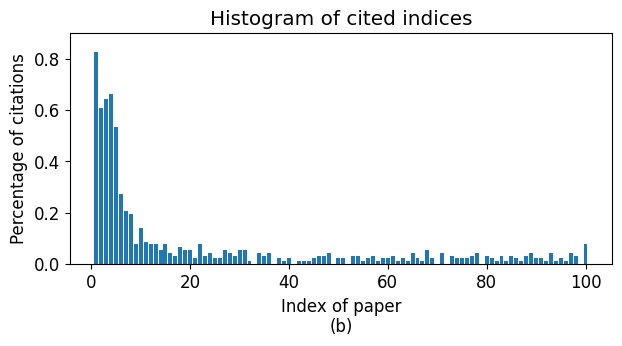

In [14]:
histogram_of_citations = histogram_of(citation_lists)
ax = plt.bar(histogram_of_citations.keys(), histogram_of_citations.values(), )
plt.title('Histogram of cited indices')
plt.xlabel('Index of paper\n(b)')
plt.ylabel('Percentage of citations')
plt.rcParams["figure.figsize"] = (7, 3)
# set font size of labels
plt.rcParams.update({'font.size': 12})

plt.ylim(0, 0.9)

plt.savefig('./cited_indices_hist.png', bbox_inches='tight')

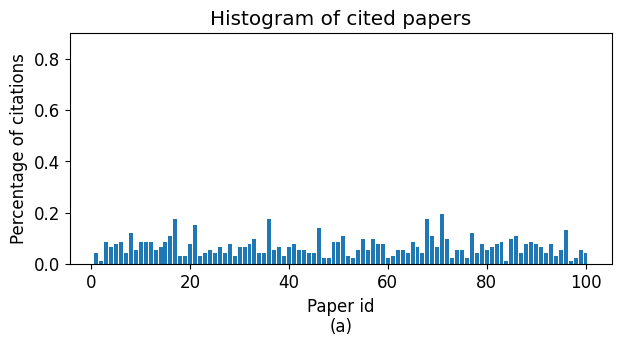

In [15]:
histogram_of_papers = histogram_of(selected_papers_list)
ax = plt.bar(histogram_of_papers.keys(), histogram_of_papers.values())
plt.title('Histogram of cited papers')
plt.xlabel('Paper id\n(a)')
plt.ylabel('Percentage of citations')
plt.rcParams["figure.figsize"] = (7, 3)
plt.rcParams.update({'font.size': 12})
plt.ylim(0, 0.9)

plt.savefig('./cited_papers_hist.png', bbox_inches='tight')